In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Carga de datos
### Carga de datos de las estaciones

In [5]:
#Lectura de estaciones
columns =['Estación','VelViento','DirViento','PM10','Pm2.5']
data_estaciones = pd.read_csv('../estaciones.txt',header=None, names=columns)
data_estaciones
#No usamos Bolivia porque no tiene ningun dato de PM 2.5 para el 22/01/2024
#No usamos Fontibon porque tiene formato diferente y extraño en fecha hora

,Estación,VelViento,DirViento,PM10,Pm2.5
0,Estación,VelViento,DirViento,PM10,Pm2.5
1,Guaymaral,True,True,True,True
2,Suba,True,True,True,True
3,Colina,True,True,True,True
4,Bolivia,False,False,False,True
5,Usaquén,True,True,True,True
6,Las Ferias,True,True,True,True
7,Fontibón,True,True,True,True
8,Estación Movil Fontibón,False,False,True,True
9,Centro de Alto Rendimiento,True,True,True,True


### Carga de datos de polución

In [ ]:
files = ['Carvajal_-_Sevillana','Centro_de_Alto_Rendimiento','Ciudad_Bolivar','Colina','Guaymaral','Jazmin','Kennedy','Las_Ferias','MinAmbiente','Movil_7ma','Movil_Fontibon','Puente_Aranda','San_Cristobal','Suba','Tunal','Usaquen','Usme']

def read_and_rename(file_prefix):
    df_pm10 = pd.read_excel(f'raw_data/{file_prefix}_PM10_22-01-2024.xlsx', skiprows=[0, 2]).rename(columns={'PM10': f'PM10{file_prefix[:7]}'})
    df_pm25 = pd.read_excel(f'raw_data/{file_prefix}_PM2.5_22-01-2024.xlsx', skiprows=[0, 2]).rename(columns={'Pm25': f'PM2.5{file_prefix[:7]}'})
    return pd.merge(df_pm10, df_pm25, on='fecha hora', how='inner')

df_enero22 = read_and_rename(files[0])
for file in files[1:]:
    df_enero22 = pd.merge(df_enero22, read_and_rename(file), on='fecha hora', how='inner')

df_enero22


,fecha hora,PM10Carvaja,PM2.5Carvaja,PM10Centro_,PM2.5Centro_,PM10Ciudad_,PM2.5Ciudad_,PM10Colina,PM2.5Colina,PM10Guaymar,...,PM10San_Cri,PM2.5San_Cri,PM10Suba,PM2.5Suba,PM10Tunal,PM2.5Tunal,PM10Usaquen,PM2.5Usaquen,PM10Usme,PM2.5Usme
0,22-01-2024 01:00,24.0,17,NaN,NaN,18.0,8.0,37,5,24,...,16.0,7,48.0,18,14,11.0,10,0,10,5.0
1,22-01-2024 02:00,27.0,16,NaN,NaN,17.0,6.0,26,5,28,...,8.0,8,56.0,14,26,12.0,9,0,25,5.0
2,22-01-2024 03:00,25.0,20,NaN,NaN,12.0,8.0,19,5,19,...,8.0,7,54.0,8,23,10.0,10,5,13,5.0
3,22-01-2024 04:00,35.0,19,NaN,NaN,9.0,7.0,19,5,31,...,NaN,10,41.0,23,10,5.0,19,8,9,4.0
4,22-01-2024 05:00,39.0,20,NaN,NaN,9.0,9.0,15,5,15,...,10.0,10,51.0,39,10,8.0,8,4,21,4.0
5,22-01-2024 06:00,66.0,38,NaN,NaN,10.0,8.0,13,5,15,...,13.0,10,70.0,36,19,13.0,8,5,12,3.0
6,22-01-2024 07:00,58.0,27,NaN,NaN,15.0,7.0,14,5,31,...,19.0,9,73.0,32,25,11.0,23,8,14,5.0
7,22-01-2024 08:00,68.0,28,6.0,4.0,13.0,6.0,15,5,45,...,17.0,7,97.0,21,25,11.0,22,22,20,6.0
8,22-01-2024 09:00,72.0,32,13.0,4.0,20.0,NaN,25,5,27,...,12.0,12,88.0,12,31,14.0,28,11,27,NaN
9,22-01-2024 10:00,52.0,22,10.0,4.0,15.0,NaN,28,6,27,...,18.0,6,74.0,7,22,22.0,14,6,27,NaN


In [ ]:
df_enero22 = pd.merge(
    pd.merge(df_enero22,pd.read_excel('raw_data/Fontibon_PM10_22-01-2024.xlsx', skiprows=[0, 2]).rename(columns={'PM10': f'PM10Fontibo'}).dropna().reset_index(drop=True),
            on='fecha hora', how='inner'),
            pd.read_excel('raw_data/Fontibon_PM2.5_22-01-2024.xlsx', skiprows=[0, 2]).rename(columns={'Pm25': f'PM2.5Fontibo'}).dropna().reset_index(drop=True),
            on='fecha hora', how='inner')
df_enero22

,fecha hora,PM10Carvaja,PM2.5Carvaja,PM10Centro_,PM2.5Centro_,PM10Ciudad_,PM2.5Ciudad_,PM10Colina,PM2.5Colina,PM10Guaymar,...,PM10Suba,PM2.5Suba,PM10Tunal,PM2.5Tunal,PM10Usaquen,PM2.5Usaquen,PM10Usme,PM2.5Usme,PM10Fontibo,PM2.5Fontibo
0,22-01-2024 01:00,24.0,17,NaN,NaN,18.0,8.0,37,5,24,...,48.0,18,14,11.0,10,0,10,5.0,18.0,8.0
1,22-01-2024 02:00,27.0,16,NaN,NaN,17.0,6.0,26,5,28,...,56.0,14,26,12.0,9,0,25,5.0,19.0,10.0
2,22-01-2024 03:00,25.0,20,NaN,NaN,12.0,8.0,19,5,19,...,54.0,8,23,10.0,10,5,13,5.0,14.0,12.0
3,22-01-2024 04:00,35.0,19,NaN,NaN,9.0,7.0,19,5,31,...,41.0,23,10,5.0,19,8,9,4.0,11.0,8.0
4,22-01-2024 05:00,39.0,20,NaN,NaN,9.0,9.0,15,5,15,...,51.0,39,10,8.0,8,4,21,4.0,11.0,10.0
5,22-01-2024 06:00,66.0,38,NaN,NaN,10.0,8.0,13,5,15,...,70.0,36,19,13.0,8,5,12,3.0,20.0,11.0
6,22-01-2024 07:00,58.0,27,NaN,NaN,15.0,7.0,14,5,31,...,73.0,32,25,11.0,23,8,14,5.0,32.0,20.0
7,22-01-2024 08:00,68.0,28,6.0,4.0,13.0,6.0,15,5,45,...,97.0,21,25,11.0,22,22,20,6.0,44.0,33.0
8,22-01-2024 09:00,72.0,32,13.0,4.0,20.0,NaN,25,5,27,...,88.0,12,31,14.0,28,11,27,NaN,33.0,19.0
9,22-01-2024 10:00,52.0,22,10.0,4.0,15.0,NaN,28,6,27,...,74.0,7,22,22.0,14,6,27,NaN,20.0,11.0


In [ ]:
df_enero22.shape

(24, 37)

In [ ]:
df_enero22.columns

Index(['fecha hora', 'PM10Carvaja', 'PM2.5Carvaja', 'PM10Centro_',
       'PM2.5Centro_', 'PM10Ciudad_', 'PM2.5Ciudad_', 'PM10Colina',
       'PM2.5Colina', 'PM10Guaymar', 'PM2.5Guaymar', 'PM10Jazmin',
       'PM2.5Jazmin', 'PM10Kennedy', 'PM2.5Kennedy', 'PM10Las_Fer',
       'PM2.5Las_Fer', 'PM10MinAmbi', 'PM2.5MinAmbi', 'PM10Movil_7',
       'PM2.5Movil_7', 'PM10Movil_F', 'PM2.5Movil_F', 'PM10Puente_',
       'PM2.5Puente_', 'PM10San_Cri', 'PM2.5San_Cri', 'PM10Suba', 'PM2.5Suba',
       'PM10Tunal', 'PM2.5Tunal', 'PM10Usaquen', 'PM2.5Usaquen', 'PM10Usme',
       'PM2.5Usme', 'PM10Fontibo', 'PM2.5Fontibo'],
      dtype='object')

### Limpieza de datos

In [ ]:
# Rellenar los valores NaN con el valor anterior en la columna
df_enero22.fillna(value=0)

,fecha hora,PM10Carvaja,PM2.5Carvaja,PM10Centro_,PM2.5Centro_,PM10Ciudad_,PM2.5Ciudad_,PM10Colina,PM2.5Colina,PM10Guaymar,...,PM10Suba,PM2.5Suba,PM10Tunal,PM2.5Tunal,PM10Usaquen,PM2.5Usaquen,PM10Usme,PM2.5Usme,PM10Fontibo,PM2.5Fontibo
0,22-01-2024 01:00,24.0,17,0.0,0.0,18.0,8.0,37,5,24,...,48.0,18,14,11.0,10,0,10,5.0,18.0,8.0
1,22-01-2024 02:00,27.0,16,0.0,0.0,17.0,6.0,26,5,28,...,56.0,14,26,12.0,9,0,25,5.0,19.0,10.0
2,22-01-2024 03:00,25.0,20,0.0,0.0,12.0,8.0,19,5,19,...,54.0,8,23,10.0,10,5,13,5.0,14.0,12.0
3,22-01-2024 04:00,35.0,19,0.0,0.0,9.0,7.0,19,5,31,...,41.0,23,10,5.0,19,8,9,4.0,11.0,8.0
4,22-01-2024 05:00,39.0,20,0.0,0.0,9.0,9.0,15,5,15,...,51.0,39,10,8.0,8,4,21,4.0,11.0,10.0
5,22-01-2024 06:00,66.0,38,0.0,0.0,10.0,8.0,13,5,15,...,70.0,36,19,13.0,8,5,12,3.0,20.0,11.0
6,22-01-2024 07:00,58.0,27,0.0,0.0,15.0,7.0,14,5,31,...,73.0,32,25,11.0,23,8,14,5.0,32.0,20.0
7,22-01-2024 08:00,68.0,28,6.0,4.0,13.0,6.0,15,5,45,...,97.0,21,25,11.0,22,22,20,6.0,44.0,33.0
8,22-01-2024 09:00,72.0,32,13.0,4.0,20.0,6.0,25,5,27,...,88.0,12,31,14.0,28,11,27,6.0,33.0,19.0
9,22-01-2024 10:00,52.0,22,10.0,4.0,15.0,6.0,28,6,27,...,74.0,7,22,22.0,14,6,27,6.0,20.0,11.0


### Visualizacion de datos

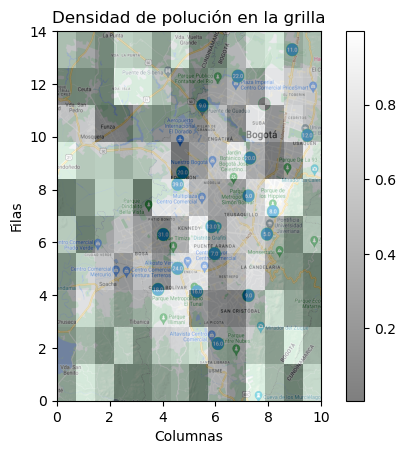

In [6]:

#@title Visualización de la grilla
def Mapa(data):
    # Cargar la imagen de fondo
    background_image = mpimg.imread('../Map1.png')




    # Crear el plot
    fig, ax = plt.subplots()

    # Mostrar la imagen de fondo
    ax.imshow(background_image, extent=[0, Lx, 0, Ly], aspect='auto')

    # Mostrar la grilla coloreada sobre la imagen de fondo
    # Ajustar alpha para hacer la grilla transparente
    cax = ax.imshow(data, cmap='gray', interpolation='nearest', extent=[0, Lx, 0, Ly], alpha=0.5)


    # Agregar una barra de colores para referencia
    plt.colorbar(cax)

    # Configurar etiquetas y título (opcional)
    plt.title('Densidad de polución en la grilla')
    plt.xlabel('Columnas')
    plt.ylabel('Filas')

    # Mostrar el plot
    plt.show()

Lx = 10
Ly = 14
# Crear una matriz de (Lx)x(Ly) con valores aleatorios entre 0 y 1
data = np.random.rand(Lx, Ly)
Mapa(data)